# Import Libraries

In [139]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Read and clean data

In [138]:

df = pd.read_csv('detail_zip.csv',index_col=0)
temp_df = pd.read_csv('uszips.csv')
temp_df = temp_df[temp_df['state_id'] == 'IL'].reset_index(drop=True)
temp_df = temp_df[['zip','population','density']]
df = df.merge(temp_df, on='zip', how='left')
df['lead_level'] = (df['1st Draw'] + df['2/3 Min'] + df['5 Min']) / 3
df = df.drop(columns=['1st Draw', '2/3 Min', '5 Min'])
bins = [0, 1, 5, float('inf')]
labels = ['Low', 'Medium', 'High']
df['lead_level_cat'] = pd.cut(df['lead_level'], bins=bins, labels=labels)
df


,zip,median_INC_2017-2021,per_capita_INC_2017-2021,major_crime_2018-2022,violent_crime_2018-2022,public_crime_2012-2016,behavioral_ health_hospitalizations_2017,cognitive_difficulty_percent_2017-2021,poverty_rate_percent_2017-2021,high_school_grad_rate_2017-2021,college_grad_rate_2017-2021,non_hispanic_white_percent_2017-2021,population,density,lead_level,lead_level_cat
0,60601,123115.0,137556.0,1736.752366,148.889510,57.189159,91.0,1.995805,5.834093,97.917725,88.031149,54.877060,14804.0,14706.9,0.940404,Low
1,60602,235666.0,168423.0,282.033895,25.289746,5.774626,25.0,0.000000,2.222222,100.000000,82.217782,47.022767,1142.0,5350.7,1.464326,Medium
2,60605,112162.0,85947.0,1675.218975,246.799483,126.443697,285.0,2.914663,8.612424,95.316371,78.088010,57.037753,32077.0,8658.3,0.911358,Low
3,60606,130196.0,133605.0,529.774357,58.453847,20.751522,66.0,0.363857,8.550637,99.266177,91.794530,59.642207,3298.0,5487.1,1.533333,Medium
4,60607,109634.0,65052.0,2208.933790,266.924943,266.380039,651.0,4.155217,16.888971,96.620012,78.920985,51.797266,29990.0,5005.4,1.676312,Medium
5,60608,61490.0,26958.0,2208.318895,582.919388,978.662767,1137.0,3.625513,16.787975,74.265756,30.445646,20.245194,83689.0,5172.7,3.682467,Medium
6,60609,43048.0,23009.0,2179.855381,760.609450,1642.447833,1116.0,4.104459,26.924702,72.765042,17.377649,14.775060,61861.0,3082.1,5.531612,High
7,60610,99246.0,93795.0,1537.345214,220.706625,182.978152,498.0,3.149999,11.993181,97.158825,78.236189,69.706756,42422.0,14725.7,1.939278,Medium
8,60611,117344.0,125624.0,2285.077683,263.585238,86.933274,248.0,1.073433,8.912987,99.282669,87.964404,67.281986,34562.0,16829.4,1.000000,Low
9,60612,52126.0,37182.0,2377.324853,729.616162,1503.783816,1366.0,5.522375,29.057230,88.019560,39.508383,22.717353,33908.0,3520.5,4.150453,Medium


# Build Tree

In [134]:
X = df[['median_INC_2017-2021', 'per_capita_INC_2017-2021',
       'major_crime_2018-2022', 'violent_crime_2018-2022',
       'public_crime_2012-2016', 'behavioral_ health_hospitalizations_2017',
       'cognitive_difficulty_percent_2017-2021',
       'poverty_rate_percent_2017-2021', 'high_school_grad_rate_2017-2021',
       'college_grad_rate_2017-2021', 'non_hispanic_white_percent_2017-2021',
       'population', 'density']]
y = df['lead_level_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.625


# Display Tree

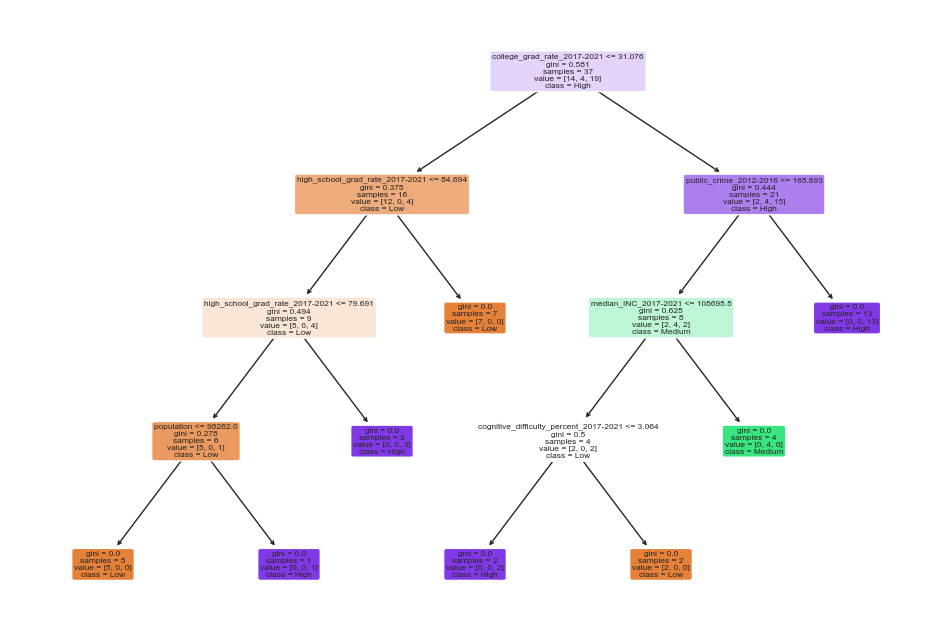

In [137]:
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=list(X.columns), class_names=['Low', 'Medium', 'High'], filled=True, rounded=True)
plt.savefig('tree.png', dpi=300)
plt.show()